## Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

## Reading data
will start by loading and displaying some values from the full Boston housing dataset with thirteen features of census tracts that are believed to be predictive of the median home price in the tract (see **housing.names.txt** for a full description of these features). By looking at the values, you will note that the values of some of the features are  about 1000 times the values of others.

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

print 'Reading data ...'
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)
df

Reading data ...


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


## Divide data into training, validation and test sets

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(df.values, bdata.target, test_size=0.4)

X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5)

# X = df.values
# y = bdata.target
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

print 'Training set size ', X_train.shape
print 'Validation set size ', X_val.shape
print 'Test set size ', X_test.shape

Training set size  (303, 13)
Validation set size  (101, 13)
Test set size  (102, 13)


## Regularized Linear Regression cost function and gradient (vectorized)
Regularized linear regression has the following cost function:
$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right) + \frac{\lambda}{2m}\left( \sum_{j=1}^{n} {\theta_j}^2 \right) $$
where $\lambda$ is a regularization parameter which controls the degree of regularization
(thus, help preventing overfitting). The regularization term puts
a penalty on the overall cost $J(\theta)$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. You should now complete the code for the method loss in the class Reg_LinearRegression_SquaredLoss in the file reg_linear_regressor_multi.py to calculate $J(\theta)$. Vectorize your code and avoid writing for loops.

Correspondingly, the partial derivative of the regularized linear regression  cost function
with respect to  $\theta_j$ is defined as:
\begin{eqnarray*}
\frac{\partial J(\theta)}{\partial \theta_0} & = & \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}){x_j}^{(i)} \\
\frac{\partial J(\theta)}{\partial \theta_j} & = & \left(\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} ){x_j}^{(i)}\right) + \frac{\lambda}{m}{\theta_j} \; \; \; \mbox{ for }j \geq 1\\
\end{eqnarray*}

This training function uses scipy's fmin_bfgs to optimize the cost function.

Here we have set the regularization parameter $\lambda$ to zero. 

Optimization terminated successfully.
         Current function value: 10.943833
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Theta at lambda = 0 is  [ 22.39537463  -0.61944612   1.55919763   0.16692556   0.83247368
  -2.17203898   1.65253097  -0.05213     -3.74209808   3.22145773
  -2.78853454  -2.11889268   0.96358071  -4.06674329]
Theta solved using normal equation is  [-0.01978226  0.05510004  0.00631354  3.86529331  0.72934727  5.35054612
 -0.01165944 -1.05315842  0.15912898 -0.01208152 -0.25615961  0.01771937
 -0.45749249]
Error on the test set with lambda = 0 is 12.3601555011
Error on the test set with lambda = 0 is 11.3836342453
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 10
  

         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 11.537770
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 11.358504
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 11.199014
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 11.445532
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 11.275259
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 11.257271
         Iterations:

         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 11.008719
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 11.379536
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 11.293506
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 11.229136
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 11.456603
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function val

         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.550010
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.530065
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.486418
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.545834
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.505059
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
     

         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 11.112432
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.103603
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.105607
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 11.091412
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.096992
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
     

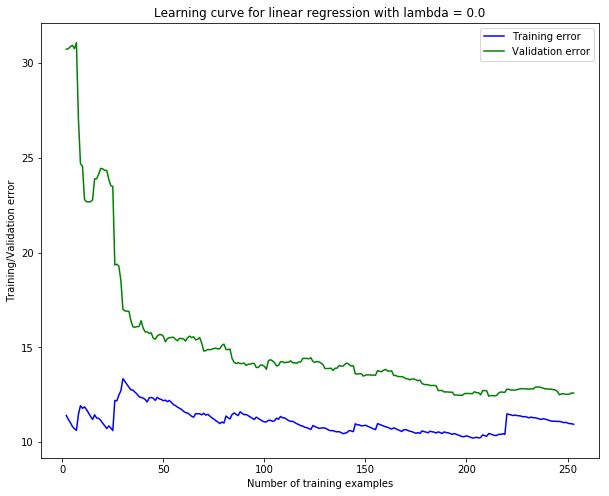

In [3]:
reg = 0.0

# Scale training features
XX_train, mu, sigma = utils.feature_normalize(X_train)
# Add a column to training set
XX = np.c_[np.ones(XX_train.shape[0]), XX_train]

XX_val = (X_val - mu)/sigma
XX_val = np.c_[np.ones(XX_val.shape[0]), XX_val]
yy = y_train

#  Train linear regression with lambda = 0
reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX,yy,reg,num_iters=1000)
print 'Theta at lambda = 0 is ', theta_opt0

theta_opt_normal = reglinear_reg1.normal_equation(X_train, y_train, reg)
print 'Theta solved using normal equation is ', theta_opt_normal
print 'Error on the test set with lambda = 0 is', reglinear_reg1.loss(theta_opt_normal, X_test, y_test, 0.0)

# Compute error on the test set
XX_test = (X_test - mu)/sigma
XX_test = np.c_[np.ones(XX_test.shape[0]), XX_test]
print 'Error on the test set with lambda = 0 is', reglinear_reg1.loss(theta_opt0, XX_test, y_test, 0.0)

# Plot learning curve
error_train, error_val = utils.learning_curve(XX,yy,XX_val,y_val,reg)
plot_utils.plot_learning_curve(error_train[50:], error_val[50:],reg)
plt.show()

## Selecting $\lambda$ using a validation set
Train the model using different values of $\lambda$ and to compute the training error and  validation error.
Try $\lambda$ in the following range: \{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}.

Then plot a validation curve of $\lambda$ versus the error, which allows us to select which best $\lambda$ value to use.

Optimization terminated successfully.
         Current function value: 10.943833
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.943940
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.944155
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.944907
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.947053
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.954551
         Iterations: 24
         Function evaluations:

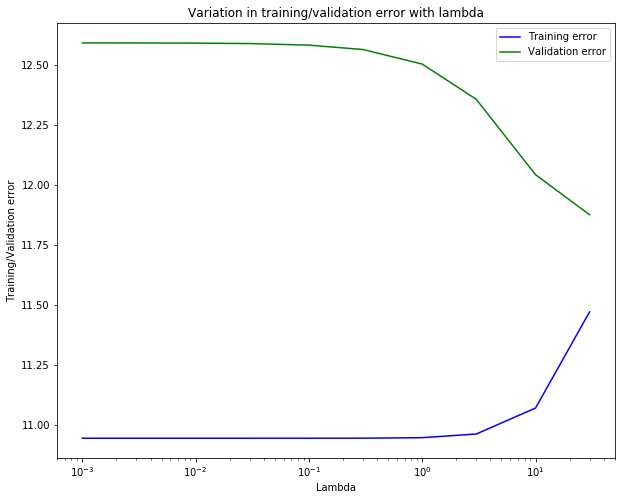

Optimization terminated successfully.
         Current function value: 11.842489
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Error on the test set with lambda = 10 is 11.1632154293


In [4]:
import myutils
reg_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
reg_vec, error_train, error_val = myutils.validation_curve(XX,yy,XX_val,y_val, reg_vec)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.savefig('fig4_linear_lambda_.png')
plt.show()


best_reg = 10
#  Train linear regression with lambda = 50
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt2 = reglinear_reg1.train(XX,yy,best_reg,num_iters=1000)
# print 'Theta at lambda = ' + str(best_reg) +' is ', theta_opt2

# Compute error on the test set
print 'Error on the test set with lambda = ' + str(best_reg)+ ' is', reglinear_reg2.loss(theta_opt2, XX_test, y_test, 0.0)

## Selecting $\lambda$ with square features
Train the model using different values of $\lambda$ and to compute the training error and  validation error.
Try $\lambda$ in the following range: \{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}.

Then plot a validation curve of $\lambda$ versus the error, which allows us to select which best $\lambda$ value to use.

Optimization terminated successfully.
         Current function value: 2.989484
         Iterations: 966
         Function evaluations: 971
         Gradient evaluations: 971
Optimization terminated successfully.
         Current function value: 3.036350
         Iterations: 692
         Function evaluations: 697
         Gradient evaluations: 697
Optimization terminated successfully.
         Current function value: 3.100847
         Iterations: 618
         Function evaluations: 623
         Gradient evaluations: 623
Optimization terminated successfully.
         Current function value: 3.245449
         Iterations: 501
         Function evaluations: 506
         Gradient evaluations: 506
Optimization terminated successfully.
         Current function value: 3.469376
         Iterations: 391
         Function evaluations: 396
         Gradient evaluations: 396
Optimization terminated successfully.
         Current function value: 3.824551
         Iterations: 276
         Function ev

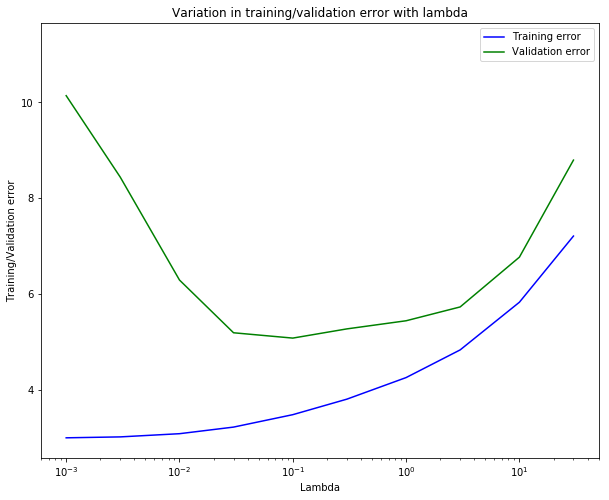

Optimization terminated successfully.
         Current function value: 4.256794
         Iterations: 193
         Function evaluations: 198
         Gradient evaluations: 198
Error on the test set with lambda = 0.3 is 4.82815820863


In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize
# We will consider a 6th order polynomial fit for the data

p = 2
poly = PolynomialFeatures(degree=p,include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_train, mu, sigma = utils.feature_normalize(X_poly_train)

# add a column of ones to X_poly
XX_poly_train = np.c_[np.ones(X_poly_train.shape[0]), X_poly_train]

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_val)

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.c_[np.ones(X_poly_test.shape[0]),X_poly_test]
XX_poly_val = np.c_[np.ones(X_poly_val.shape[0]),X_poly_val]

#
reg_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
reg_vec, error_train, error_val = myutils.validation_curve(XX_poly_train,yy,XX_poly_val,y_val, reg_vec)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.savefig('fig4_quadratic_lambda_01.png')
plt.show()



best_reg = 0.3

# Plot learning curve
# error_train, error_val = utils.learning_curve(X_poly_train,yy,X_poly_val,y_val,best_reg)
# plot_utils.plot_learning_curve(error_train, error_val,best_reg)
# plt.show()

#  Train linear regression with lambda = 50
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt2 = reglinear_reg1.train(XX_poly_train,yy,best_reg,num_iters=1000)
# print 'Theta at lambda = ' + str(best_reg) +' is ', theta_opt2

# Compute error on the test set
print 'Error on the test set with lambda = ' + str(best_reg)+ ' is', reglinear_reg2.loss(theta_opt2, XX_poly_test, y_test, 0.0)

## Selecting $\lambda$ with cubic features

Optimization terminated successfully.
         Current function value: 0.806967
         Iterations: 666
         Function evaluations: 676
         Gradient evaluations: 676
Optimization terminated successfully.
         Current function value: 1.139344
         Iterations: 484
         Function evaluations: 494
         Gradient evaluations: 494
Optimization terminated successfully.
         Current function value: 1.594019
         Iterations: 331
         Function evaluations: 341
         Gradient evaluations: 341
Optimization terminated successfully.
         Current function value: 2.115700
         Iterations: 232
         Function evaluations: 242
         Gradient evaluations: 242
Optimization terminated successfully.
         Current function value: 2.841513
         Iterations: 142
         Function evaluations: 152
         Gradient evaluations: 152
Optimization terminated successfully.
         Current function value: 3.645624
         Iterations: 92
         Function eva

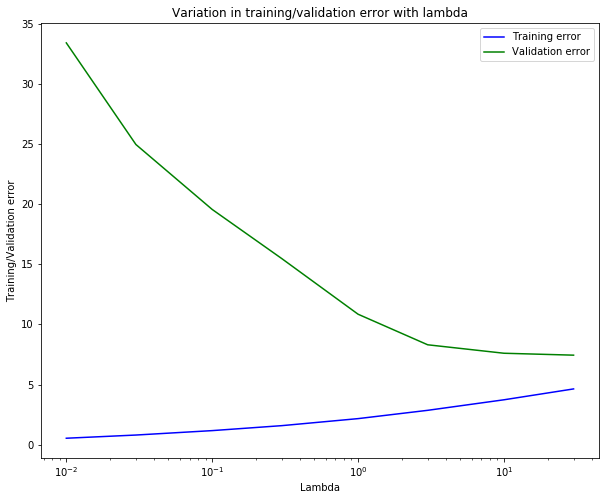

Optimization terminated successfully.
         Current function value: 3.645624
         Iterations: 92
         Function evaluations: 102
         Gradient evaluations: 102
Error on the test set with lambda = 3.0 is 4.73217608015


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize
# We will consider a 6th order polynomial fit for the data

p = 3
poly = PolynomialFeatures(degree=p,include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_train, mu, sigma = utils.feature_normalize(X_poly_train)

# add a column of ones to X_poly
XX_poly_train = np.c_[np.ones(X_poly_train.shape[0]), X_poly_train]

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_val)

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.c_[np.ones(X_poly_test.shape[0]),X_poly_test]
XX_poly_val = np.c_[np.ones(X_poly_val.shape[0]),X_poly_val]

#
reg_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
reg_vec, error_train, error_val = myutils.validation_curve(XX_poly_train,yy,XX_poly_val,y_val, reg_vec)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.savefig('fig4_cubic_lambda_3.png')
plt.show()

best_reg = 3.0

# Plot learning curve
# error_train, error_val = utils.learning_curve(X_poly_train,yy,X_poly_val,y_val,best_reg)
# plot_utils.plot_learning_curve(error_train, error_val,best_reg)
# plt.show()

#  Train linear regression with lambda = 50
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt2 = reglinear_reg1.train(XX_poly_train,yy,best_reg,num_iters=1000)

# Compute error on the test set
print 'Error on the test set with lambda = ' + str(best_reg) +' is', reglinear_reg1.loss(theta_opt2, XX_poly_test, y_test, 0.0)